In [0]:
import tensorflow as tf
import numpy as np
import matplotlib as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

############  IT WILL TAKE SOMETIME ; PLEASE WAIT TO SEE ALL THE RESULTS #############################

In [0]:
def PCA(x_train, y_train):
    ################################################################
    
    # W is (60000, 2/3)
    # H is (2/3, 784)
    # x_train is (60000, 784)
    
    ################################################################
    x = np.abs(x_train.reshape((x_train.shape[0],x_train.shape[1]*x_train.shape[2])))
    x = StandardScaler().fit_transform(x)
    mean1 = np.mean(x,axis=0)
    
    cov_mat = ((x-mean1).T @ (x-mean1)) / x.shape[0]
    
    vals, vecs = np.linalg.eig(cov_mat)
    eig_pairs = [(np.abs(vals[i]), vecs[:,i]) for i in range(len(vals))]
    eig_pairs.sort(key=lambda x1: x1[0], reverse=True)
    eig_pairs = np.array(eig_pairs)
 
    ########################## Reduced to 2 Dimensions using PCA ##################################################################
    U_2D = np.column_stack((eig_pairs[0,1],eig_pairs[1,1]))
    y1 = x @ U_2D
    plt.pyplot.scatter(y1[:,0],y1[:,1],c=y_train)

    print("\n#################### data transformation 2D; PCA ####################\n")
    plt.pyplot.show()

    ################################# RECONSTRUCTION ######################################################
    y_digits = []
    for i in range(10):
        y_digits.append(np.where(y_train==i)[0][0])
    y_digits= np.array(y_digits)

    print("\n#################### 10 reconstructed images for 2D from 0-9; PCA ####################\n")    
    for i in y_digits:
        plt.pyplot.imshow(( (y1[i,0]*eig_pairs[0,1]) + (y1[i,1]*eig_pairs[1,1])  ).reshape((28,28)))
        plt.pyplot.show()

    ########################## Reduced to 3 Dimensions using PCA ##################################################################
    U_3D = np.column_stack((eig_pairs[0,1],eig_pairs[1,1],eig_pairs[2,1]))
    y2 = x @ U_3D
    fig = plt.pyplot.figure()
    pca_3d = fig.add_subplot(111, projection='3d')
    pca_3d.scatter(y2[:,0],y2[:,1], y2[:,2], c=y_train)

    print("\n#################### data transformation 3D; PCA ####################\n")
    plt.pyplot.show()
    
    print("\n#################### 10 reconstructed images for 3D from 0-9; PCA ####################\n")    
    for i in y_digits:
        plt.pyplot.imshow(( (y2[i,0]*eig_pairs[0,1]) + (y2[i,1]*eig_pairs[1,1]) + (y2[i,2]*eig_pairs[2,1])  ).reshape((28,28)))
        plt.pyplot.show()

    print("\n#################### 3 basis vectors for both 2D(first 2) & 3D; PCA ####################\n")
    plt.pyplot.imshow(eig_pairs[0,1].reshape((28,28)))
    plt.pyplot.show()
    plt.pyplot.imshow(eig_pairs[1,1].reshape((28,28)))
    plt.pyplot.show()
    plt.pyplot.imshow(eig_pairs[2,1].reshape((28,28)))
    plt.pyplot.show()
    

In [0]:
def NMF_dr(x_train, y_train):
    ################################################################
    
    # W is (60000, 2/3)
    # H is (2/3, 784)
    # x_train is (60000, 784)
    
    ################################################################
    x_train = x_train.reshape((x_train.shape[0],x_train.shape[1]*x_train.shape[2]))
    #Initialization for 2D
    b = 10**-100
    W = np.random.rand(x_train.shape[0],2) 
    H = np.random.rand(2,x_train.shape[1]) 
    max_itr=50

    for n in range(max_itr):
        W = W * ((x_train @ H.T)/((W @ H @ H.T)+b)) 
        H = H * ((W.T @ x_train)/((W.T @ W @ H)+b)) 
    
    fig1 = plt.pyplot.figure()
    nmf_2d = fig1.add_subplot(111)
    nmf_2d.scatter(W[:,0], W[:,1], c=y_train)
    print("\n#################### data transformation 2D; NMF ####################\n")
    plt.pyplot.show()
    print("\n#################### 2 basis vectors for 2D; NMF ####################\n")
    plt.pyplot.imshow(H[0].reshape((28,28)))
    plt.pyplot.show()
    plt.pyplot.imshow(H[1].reshape((28,28)))
    plt.pyplot.show()
    
    y_digits = []
    for i in range(10):
        y_digits.append(np.where(y_train==i)[0][0])
    y_digits= np.array(y_digits)
    print("\n#################### 10 reconstructed images for 2D from 0-9; NMF ####################\n")    
    V = W @ H
    for i in y_digits:
        plt.pyplot.imshow(V[i].reshape((28,28)))
        plt.pyplot.show()


    #Initialization for 3D
    W = np.random.rand(x_train.shape[0],3)
    H = np.random.rand(3,x_train.shape[1]) 

    for n in range(max_itr):
        W = W * ((x_train @ H.T)/((W @ H @ H.T)+b)) 
        H = H * ((W.T @ x_train)/((W.T @ W @ H)+b))
    
    fig2 = plt.pyplot.figure()
    nmf_3d = fig2.add_subplot(111, projection='3d')
    nmf_3d.scatter(W[:,0], W[:,1], W[:,2], c=y_train)
    print("\n#################### data transformation 3D; NMF ####################\n")
    plt.pyplot.show()
    print("\n#################### 3 basis vectors for 3D; NMF ####################\n")
    plt.pyplot.imshow(H[0].reshape((28,28)))
    plt.pyplot.show()
    plt.pyplot.imshow(H[1].reshape((28,28)))
    plt.pyplot.show()
    plt.pyplot.imshow(H[2].reshape((28,28)))
    plt.pyplot.show()
    print("\n#################### 10 reconstructed images for 3D from 0-9; NMF ####################\n")    
    V = W @ H
    for i in y_digits:
        plt.pyplot.imshow(V[i].reshape((28,28)))
        plt.pyplot.show()
    

In [0]:
def PLCA(x , y):
    ################################################################
                       ### READ  CAREFULLY ###
    # W is (784, 2/3)
    # H is (2/3, 60000)
    # x is (60000, 784)

    ################################################################
    x = x.reshape((x.shape[0],x.shape[1]*x.shape[2])).T
    #x[x <= 100] = 0.0
    #x[x > 100] = 1.0
    b = 10**-100
    ################################## 2D ########################################
    W = np.random.rand(x.shape[0],2)
    H = np.random.rand(2,x.shape[1])
    max_itr=20

    # declaration of Auxiliary function
    Q = np.zeros((2,x.shape[0],x.shape[1]))
    Q = Q.astype(float)

    for n in range(max_itr):
        for i in range(W.shape[1]):
            Q[i] = W[:,i].reshape(W.shape[0],1) @ H[i].reshape(1,H.shape[1])
            Q[i] /= ((W @ H) + b)
        for i in range(W.shape[1]):
            H[i] = (x * Q[i]).sum(axis=0)
            W[:,i] = (x.T * Q[i].T).sum(axis=0)
        H = (H/(H.T.sum(axis=1) + b))
        W = (W/(W.T.sum(axis=1) + b))
        
    fig4 = plt.pyplot.figure()
    plca_2d = fig4.add_subplot(111)
    plca_2d.scatter(H[0], H[1],c=y)
    print("\n#################### data transformation 2D; PLCA ####################\n")
    plt.pyplot.show()
    print("\n#################### 2 basis vectors for 2D; PLCA ####################\n")
    plt.pyplot.imshow(W[:,0].reshape((28,28)))
    plt.pyplot.show()
    plt.pyplot.imshow(W[:,1].reshape((28,28)))
    plt.pyplot.show()

    y_digits = []
    for i in range(10):
        y_digits.append(np.where(y_train==i)[0][0])
    y_digits= np.array(y_digits)
    print("\n#################### 10 reconstructed images for 2D from 0-9; PLCA ####################\n")    
    V = W @ H
    for i in y_digits:
        plt.pyplot.imshow(V[:,i].reshape((28,28)))
        plt.pyplot.show()
    ################################## 3D ########################################
    W = np.random.rand(x.shape[0],3)
    H = np.random.rand(3,x.shape[1])
    max_itr=20

    # declaration of Auxiliary function
    Q = np.zeros((3,x.shape[0],x.shape[1]))
    Q = Q.astype(float)

    for n in range(max_itr):
        for i in range(W.shape[1]):
            Q[i] = W[:,i].reshape(W.shape[0],1) @ H[i].reshape(1,H.shape[1])
            Q[i] /= ((W @ H) + b)
        for i in range(W.shape[1]):
            H[i] = (x * Q[i]).sum(axis=0)
            W[:,i] = (x.T * Q[i].T).sum(axis=0)
        H = (H/(H.T.sum(axis=1) + b))
        W = (W/(W.T.sum(axis=1) + b))
    print("\n#################### data transformation 3D; PLCA ####################\n")  
    fig3 = plt.pyplot.figure()
    plca_3d = fig3.add_subplot(111, projection='3d')
    plca_3d.scatter(H[0], H[1], H[2], c=y)
    plt.pyplot.show()
    print("\n#################### 3 basis vectors for 3D; PLCA ####################\n")
    plt.pyplot.imshow(W[:,0].reshape((28,28)))
    plt.pyplot.show()
    plt.pyplot.imshow(W[:,1].reshape((28,28)))
    plt.pyplot.show()
    plt.pyplot.imshow(W[:,2].reshape((28,28)))
    plt.pyplot.show()
    print("\n#################### 10 reconstructed images for 3D from 0-9; PLCA ####################\n")    
    V = W @ H
    for i in y_digits:
        plt.pyplot.imshow(V[:,i].reshape((28,28)))
        plt.pyplot.show()


In [0]:
def NMF_cf_tr(x, y):
    x = x.reshape((x.shape[0],x.shape[1]*x.shape[2]))
    b = 10**-100

    x0 = x[np.where(y==0)]
    x1 = x[np.where(y==1)]
    x2 = x[np.where(y==2)]
    x3 = x[np.where(y==3)]
    x4 = x[np.where(y==4)]
    x5 = x[np.where(y==5)]
    x6 = x[np.where(y==6)]
    x7 = x[np.where(y==7)]
    x8 = x[np.where(y==8)]
    x9 = x[np.where(y==9)]
    ################################################################
    
    # W0...9 is (samples(0...9), 4)
    # H is (4, 784)
    # x0...9 is (samples(0...9), 784)
    
    ################################################################

    max_itr = 50
    K=4
###########################################################
    W9 = np.random.rand(x9.shape[0],K) 
    H9 = np.random.rand(K,x9.shape[1]) 
    for n in range(max_itr):
        W9 = W9 * ((x9 @ H9.T)/((W9 @ H9 @ H9.T)+b)) 
        H9 = H9 * ((W9.T @ x9)/((W9.T @ W9 @ H9)+b))

    W0 = np.random.rand(x0.shape[0],K) 
    H0 = np.random.rand(K,x0.shape[1]) 
    for n in range(max_itr):
        W0 = W0 * ((x0 @ H0.T)/((W0 @ H0 @ H0.T)+b)) 
        H0 = H0 * ((W0.T @ x0)/((W0.T @ W0 @ H0)+b))

    W1 = np.random.rand(x1.shape[0],K) 
    H1 = np.random.rand(K,x1.shape[1]) 
    for n in range(max_itr):
        W1 = W1 * ((x1 @ H1.T)/((W1 @ H1 @ H1.T)+b)) 
        H1 = H1 * ((W1.T @ x1)/((W1.T @ W1 @ H1)+b))

    W2 = np.random.rand(x2.shape[0],K) 
    H2 = np.random.rand(K,x2.shape[1]) 
    for n in range(max_itr):
        W2 = W2 * ((x2 @ H2.T)/((W2 @ H2 @ H2.T)+b)) 
        H2 = H2 * ((W2.T @ x2)/((W2.T @ W2 @ H2)+b))

    W3 = np.random.rand(x3.shape[0],K) 
    H3 = np.random.rand(K,x3.shape[1]) 
    for n in range(max_itr):
        W3 = W3 * ((x3 @ H3.T)/((W3 @ H3 @ H3.T)+b)) 
        H3 = H3 * ((W3.T @ x3)/((W3.T @ W3 @ H3)+b))

    W4 = np.random.rand(x4.shape[0],K) 
    H4 = np.random.rand(K,x4.shape[1]) 
    for n in range(max_itr):
        W4 = W4 * ((x4 @ H4.T)/((W4 @ H4 @ H4.T)+b)) 
        H4 = H4 * ((W4.T @ x4)/((W4.T @ W4 @ H4)+b))

    W5 = np.random.rand(x5.shape[0],K) 
    H5 = np.random.rand(K,x5.shape[1]) 
    for n in range(max_itr):
        W5 = W5 * ((x5 @ H5.T)/((W5 @ H5 @ H5.T)+b)) 
        H5 = H5 * ((W5.T @ x5)/((W5.T @ W5 @ H5)+b))

    W6 = np.random.rand(x6.shape[0],K) 
    H6 = np.random.rand(K,x6.shape[1]) 
    for n in range(max_itr):
        W6 = W6 * ((x6 @ H6.T)/((W6 @ H6 @ H6.T)+b)) 
        H6 = H6 * ((W6.T @ x6)/((W6.T @ W6 @ H6)+b))

    W7 = np.random.rand(x7.shape[0],K) 
    H7 = np.random.rand(K,x7.shape[1]) 
    for n in range(max_itr):
        W7 = W7 * ((x7 @ H7.T)/((W7 @ H7 @ H7.T)+b)) 
        H7 = H7 * ((W7.T @ x7)/((W7.T @ W7 @ H7)+b))

    W8 = np.random.rand(x8.shape[0],K) 
    H8 = np.random.rand(K,x8.shape[1]) 
    for n in range(max_itr):
        W8 = W8 * ((x8 @ H8.T)/((W8 @ H8 @ H8.T)+b)) 
        H8 = H8 * ((W8.T @ x8)/((W8.T @ W8 @ H8)+b))
##################################################################
    return np.array([H0,H1,H2,H3,H4,H5,H6,H7,H8,H9])


In [0]:
def NMF_cf(x, H):
    ################################################################
    
    # W is (10, 1, 4)
    # H is (10, 4, 784)
    # x is (784,)
    
    ################################################################
    x = x.reshape((1,x.shape[0]*x.shape[1]))
    b = 10**-100
    max_itr=50
    
    W = np.random.rand(10,1,H.shape[1])  
    for i in range(10):
        for n in range(max_itr):
            W[i] = W[i] * ((x @ H[i].T)/((W[i] @ H[i] @ H[i].T)+b)) 

    pred = 0
    for i in range(10):
        if np.linalg.norm(x-(W[i] @ H[i])) < np.linalg.norm(x-(W[pred] @ H[pred])):
            pred = i
    
    return pred


#################### data transformation 2D; PLCA ####################



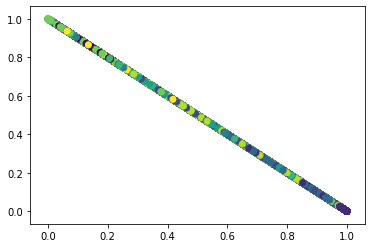


#################### 2 basis vectors for 2D; PLCA ####################



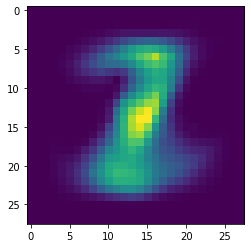

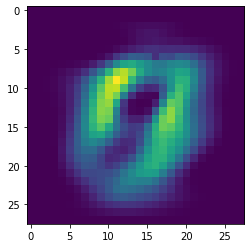


#################### 10 reconstructed images for 2D from 0-9; PLCA ####################



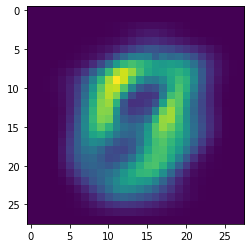

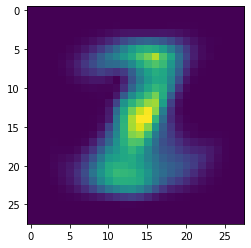

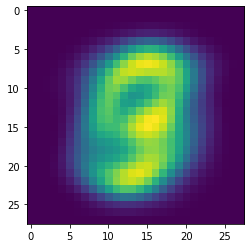

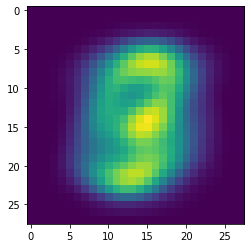

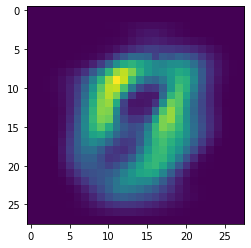

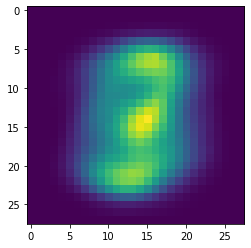

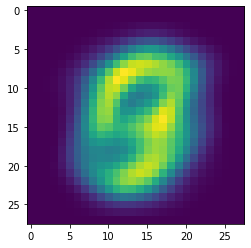

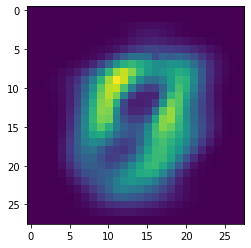

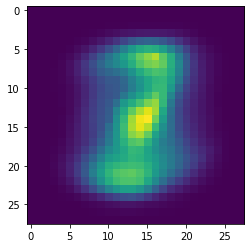

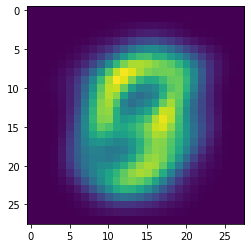


#################### data transformation 3D; PLCA ####################



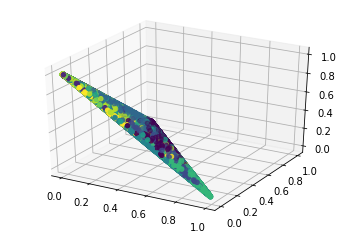


#################### 3 basis vectors for 3D; PLCA ####################



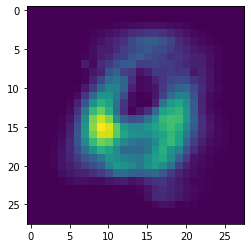

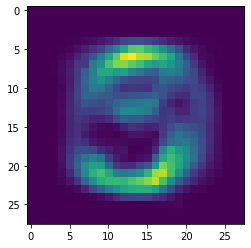

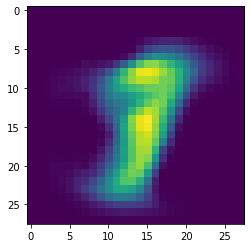


#################### 10 reconstructed images for 3D from 0-9; PLCA ####################



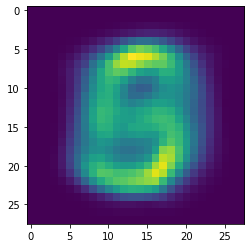

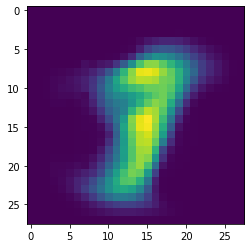

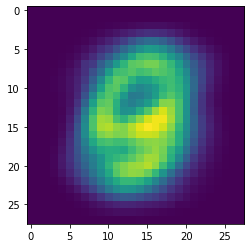

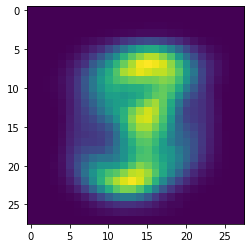

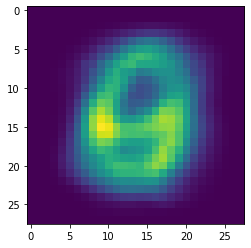

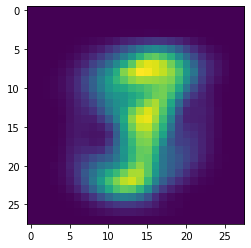

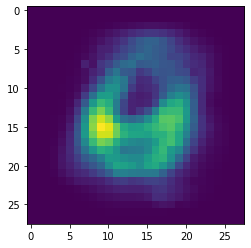

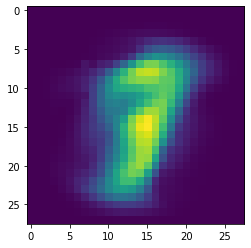

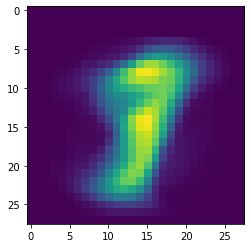

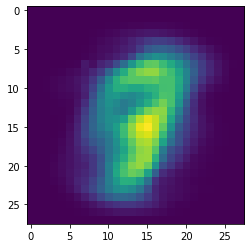

In [0]:
if __name__=="__main__":
    (x_train, y_train), (x_test, y_test) = np.array(tf.keras.datasets.mnist.load_data())
    x_train = x_train.astype(float)
    x_test = x_test.astype(float)   
    '''
    # Dimension Reduction using PCA
    PCA(x_train, y_train)
    
    # Dimension Reduction using NMF
    NMF_dr(x_train,y_train)
    '''
    # Dimension Reduction using PLCA
    PLCA(x_train,y_train)
    '''
    #Classification using NMF
    
    y_pred=[]
    H = NMF_cf_tr(x_train,y_train)
    for i in range(x_test.shape[0]):
        y_pred.append(NMF_cf(x_test[i],H))
    y_pred = np.array(y_pred)
    print("\nCLASSIFICATION ACCURACY FOR NMF :",100*(((y_test==y_pred).sum())/y_test.shape[0]),"\n")
    CM = np.zeros((10,10))
    for i in range(y_test.shape[0]):
        CM[y_test[i],y_pred[i]] += 1
    print("\n#################### CONFUSION MATRIX FOR NMF CLASSIFICATION ####################\n")
    print(CM.astype(int))
    
    for n in range(10):
        print("\n#################### 4 basis vectors for NMF classification of {} ####################\n".format(n))
        for i in range(H.shape[1]):
            plt.pyplot.imshow(H[n,i].reshape((28,28)))
            plt.pyplot.show()
    '''